In [2232]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score        
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.metrics import accuracy_score,confusion_matrix , recall_score, f1_score, classification_report

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2233]:
data = pd.read_csv('/home/ali/Downloads/project 5/diabetes.csv')

In [2234]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2235]:
data.shape

(768, 9)

In [2236]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [2237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2238]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
394,4,158,78,0,0,32.9,0.803,31,1
87,2,100,68,25,71,38.5,0.324,26,0
265,5,96,74,18,67,33.6,0.997,43,0
330,8,118,72,19,0,23.1,1.476,46,0
630,7,114,64,0,0,27.4,0.732,34,1


In [2239]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2240]:
data.duplicated().sum() 

0

#Analysis


In [2241]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

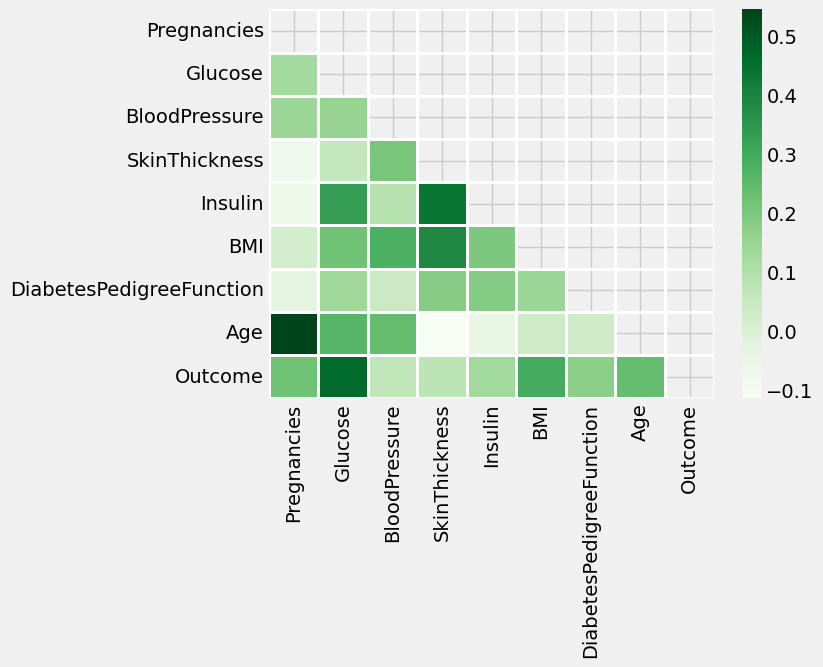

In [2242]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=False , cmap='Greens' , linewidths=2 , mask=mask)

<Axes: xlabel='Outcome', ylabel='count'>

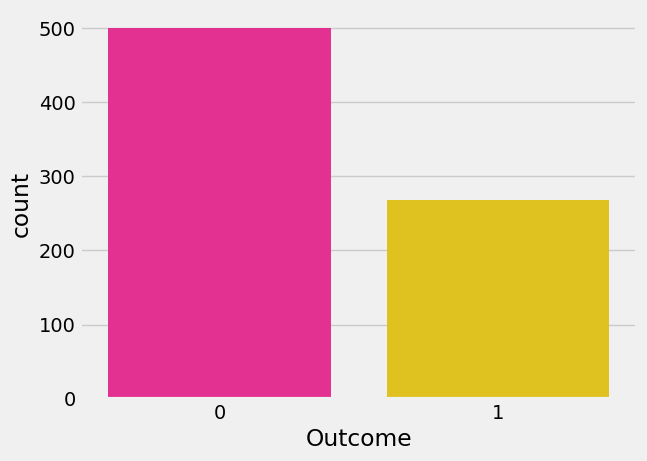

In [2243]:
sns.countplot(x='Outcome', data=data,palette=['#FF1493','#FFD700']) 

<Axes: title={'center': 'Boxplot'}, ylabel='Pregnancies'>

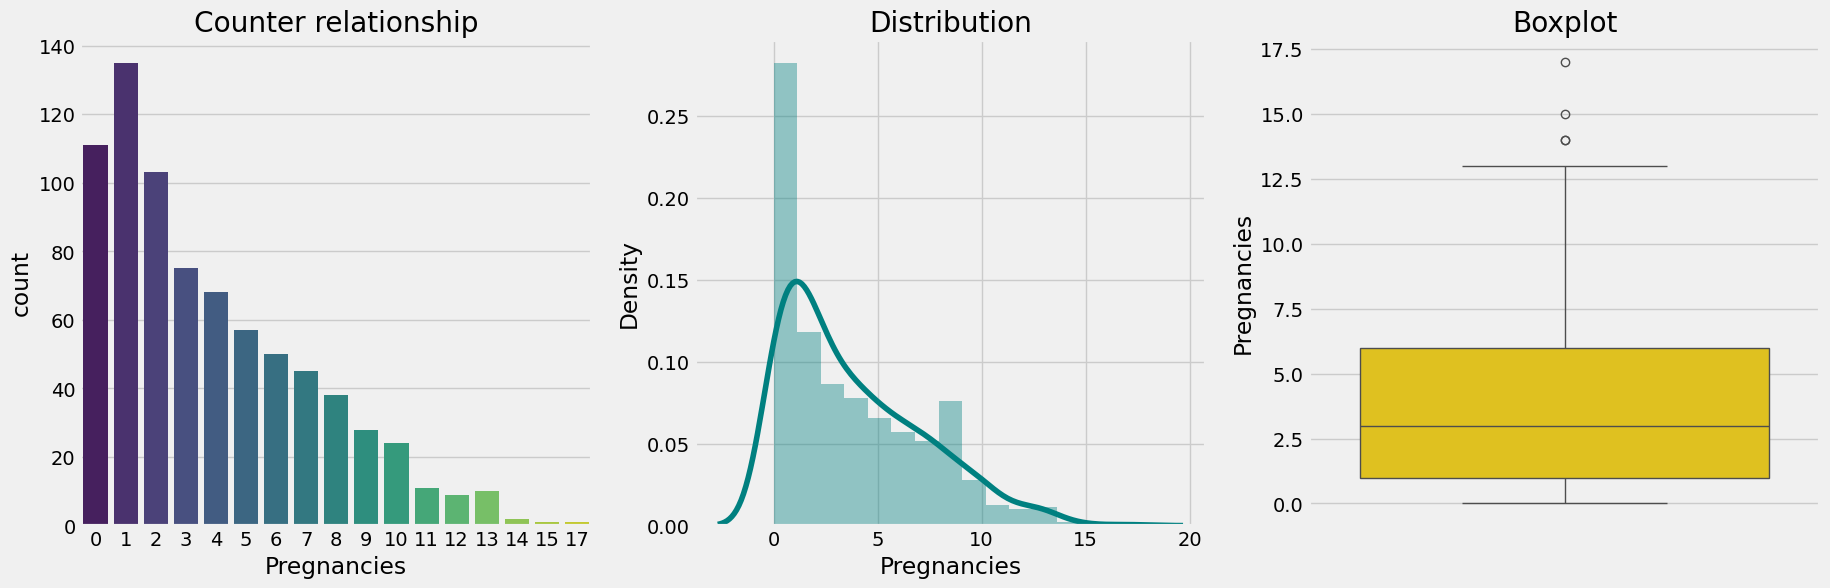

In [2244]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter relationship")
sns.countplot(x='Pregnancies', data=data, palette='viridis')

plt.subplot(1,3,2)
plt.title("Distribution")
sns.distplot(data['Pregnancies'], kde=True, color='teal', bins=15)

plt.subplot(1,3,3)
plt.title("Boxplot")
sns.boxplot(data['Pregnancies'], color='gold')



#Create Model

In [2245]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [2246]:
rm = RandomOverSampler(random_state=41)
X_res, y_res = rm.fit_resample(X, y)
print(Counter(y))
print(Counter(y_res))

Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


In [2247]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=41)   

In [2248]:
model1= RandomForestClassifier(class_weight='balanced', n_estimators=1000)
model2 = GradientBoostingClassifier(n_estimators=1000)
model3 = LogisticRegression()
model4 = SVC()
col=['RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','SVC']
resutl2=[]
result3=[]
results4=[]

In [2249]:
def mo(model):
    print(model)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    resutl2.append(accuracy_score(y_test, y_pred))
    result3.append(recall_score(y_test, y_pred))
    results4.append(f1_score(y_test, y_pred))
    

In [2250]:
mo(model1)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)


In [2251]:
mo(model2)

GradientBoostingClassifier(n_estimators=1000)


In [2252]:
mo(model3)

LogisticRegression()


In [2253]:
mo(model4)

SVC()


In [2254]:
final = pd.DataFrame({'Algorithms':col,'Accuracy':resutl2,'Recall':result3,'F1':results4})
final

,Algorithms,Accuracy,Recall,F1
0,RandomForestClassifier,0.865,0.896226,0.875576
1,GradientBoostingClassifier,0.845,0.886792,0.858447
2,LogisticRegression,0.740,0.707547,0.742574
3,SVC,0.690,0.660377,0.693069


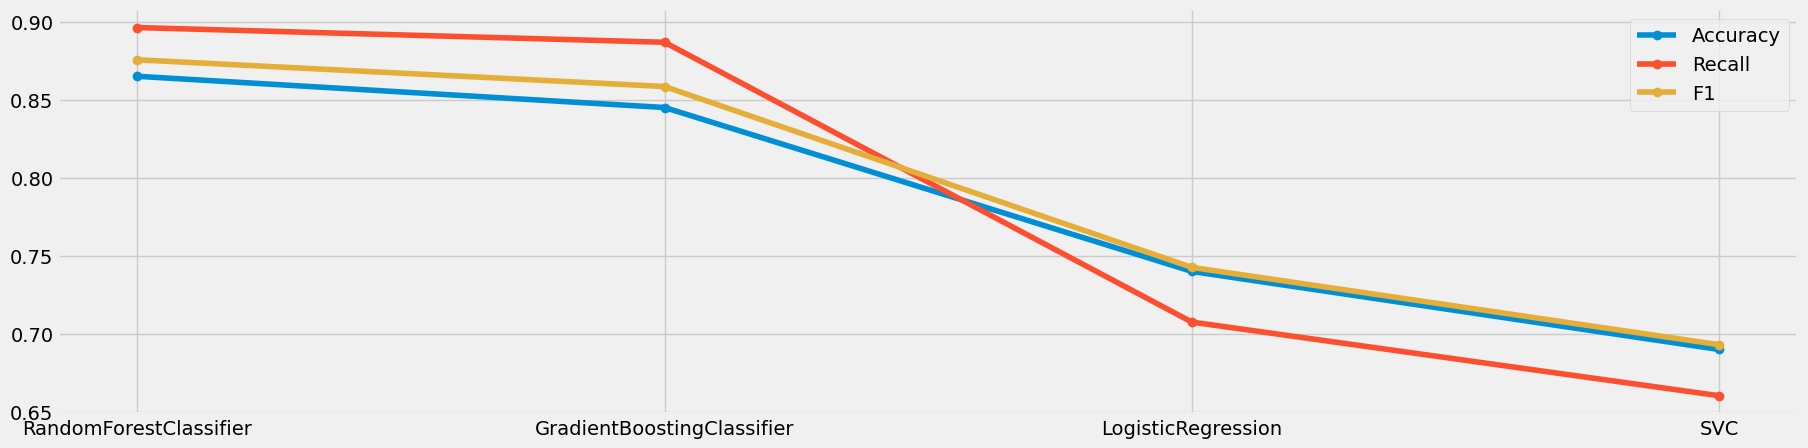

In [2255]:
fig,ax = plt.subplots(figsize=(20,5))
plt.plot(final['Algorithms'],final['Accuracy'],label='Accuracy',marker='o')
plt.plot(final['Algorithms'],final['Recall'],label='Recall',marker='o')
plt.plot(final['Algorithms'],final['F1'],label='F1',marker='o')
plt.legend()